# Market Segmentation exercise
#### Aris Dressino, October 2019, Big Data and Management at Luiss Business School

- for scooter company
- identify clusters to perform marketing
- scooters are taken and given to special stations
- 30 free minutes for unlimited trips with membership

## Cleaning and Normalizing data for sex identification

In [1]:
# general libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
mkt = pd.read_csv('MarketSegmentation.csv')


In [3]:
# dimensions of dataframe
mkt.shape


(185190, 7)

In [4]:
# extracting values for classification problem
x = mkt.iloc[:, :6].values
y = mkt.iloc[:, -1].values


In [5]:
print(x.shape)    # independent variables
y    # dependent variable = sex of the user


(185190, 6)


array([0, 0, 1, ..., 0, 0, 0])

In [6]:
# train-test split at 20%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# normalization of numerical variables (1b)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)    # standardization mean = 0, sd=1
x_test = sc.fit_transform(x_test)


In [7]:
print(x.shape)
print(x_test.shape)
# y_test


(185190, 6)
(37038, 6)


## KNN Classification of sex <- More Precise

In [8]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'euclidean', p = 2)    # or 'minkowski'
classifier.fit(x_train, y_train)

# Predicting the Test set results about sex of customers
y_pred = classifier.predict(x_test)


In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

# accuracy of 65%

array([[25695,  1568],
       [ 8569,  1206]])

## Random Forest Classification of sex

In [10]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm    # accuracy of 58%

array([[22077,  5186],
       [ 7118,  2657]])

## Clustering analysis

- study of clusters group

In [11]:
mkt = pd.read_csv('MarketSegmentation.csv')

x = mkt.iloc[:].values

# # standardization mean = 0, sd=1 (1b)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)    # features' scaling

x.shape

(185190, 7)

In [25]:
scal = dict()
for n in x[:,2]: 
    if (n in scal): 
         scal[n] += 1
    else: 
         scal[n] = 1
scal = dict(sorted(scal.items()))
for key, value in scal.items(): 
    print (" scaled value %.6f  : %.6f"%(key, value))
    
print(x[:,2])

# theoretically, it is not always a good idea to standardize categorical variables, but we can observe that the binary relation
# 0 and 1 of one-hot encoded variables is maintained between the observations although we have different values representing it
# I have chosen to use standardized distributions for categories in order to fit them better with other the other dimensions


 scaled value -0.815991  : 111169.000000
 scaled value 1.225503  : 74021.000000
[ 1.22550299  1.22550299 -0.81599148 ...  1.22550299  1.22550299
  1.22550299]


## Elbow Method on multiple dimensions

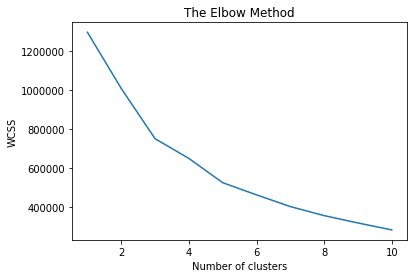

In [13]:
# Using the elbow method to find the optimal number of clusters (2)
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# 6 clusters could be the point where the decreasing function is stabilized


## K-Means fitting

- probably overfitting due to outliers and complex dimensionality

In [14]:
# y_km

# function to count observations in the clusters
def count_clusters(ls):
    km = {} 
    for n in ls: 
        if (n in km): 
             km[n] += 1
        else: 
            km[n] = 1
    km = dict(sorted(km.items()))
    for key, value in km.items(): 
        print (" cluster % d : % d"%(key, value))

In [15]:
#### Fitting K-Means = 10 to the dataset

km10 = KMeans(n_clusters = 10, init = 'k-means++', random_state = 40)

y_km10 = km10.fit_predict(x)


In [16]:
y_km10

array([9, 9, 3, ..., 0, 0, 0], dtype=int32)

In [17]:
count_clusters(y_km10)    # overfitting and groups with too little observations


 cluster  0 :  18282
 cluster  1 :  15785
 cluster  2 :  15822
 cluster  3 :  7971
 cluster  4 :  104
 cluster  5 :  28495
 cluster  6 :  44597
 cluster  7 :  16713
 cluster  8 :  9740
 cluster  9 :  27681


In [18]:
# 10 centroids of 7 dimensions
km10.cluster_centers_


array([[-4.37037570e-02, -6.95701984e-01,  1.19771009e+00,
        -5.77071763e-01,  1.33416345e+00, -4.37597572e-01,
        -5.90125256e-01],
       [ 1.59496666e-02,  1.43739708e+00, -8.15991481e-01,
        -5.77071763e-01, -1.36924398e-02, -6.00334036e-02,
         1.67446738e+00],
       [ 2.95904290e-02, -6.95701984e-01,  1.14856289e+00,
        -5.77071763e-01, -2.99369916e-02, -4.52731568e-01,
         1.67446738e+00],
       [ 2.10268995e-02, -6.95701984e-01, -8.15991481e-01,
         1.73288673e+00, -3.76840561e-01,  2.20881439e+00,
         2.60729473e-02],
       [ 3.53492665e+01, -2.44469489e-01, -5.80434426e-01,
         7.11174320e-01, -4.96760016e-02, -1.76711718e-02,
        -7.44377049e-03],
       [-2.81014635e-02, -6.95701984e-01, -8.15991481e-01,
         1.73288673e+00, -2.13480546e-01, -4.52731568e-01,
        -5.97204825e-01],
       [-8.01562899e-02,  1.43677528e+00, -8.15991481e-01,
        -5.77071763e-01,  1.76084496e-01, -1.92109302e-01,
        -5.9720482

In [19]:
#### Fitting K-Means = 6 to the dataset <- good clustering

km6 = KMeans(n_clusters = 6, init = 'k-means++', random_state = 40)    # or 'random'

y_km6 = km6.fit_predict(x)

count_clusters(y_km6)


 cluster  0 :  31484
 cluster  1 :  53673
 cluster  2 :  38236
 cluster  3 :  45822
 cluster  4 :  104
 cluster  5 :  15871


In [20]:
# 6 centroids of 7 dimensions
km6.cluster_centers_


array([[ 6.64857932e-02, -2.41493620e-01,  1.52622559e-01,
         7.75478889e-03, -2.33527774e-01,  2.20881439e+00,
         9.48167785e-02],
       [-6.83510641e-02,  1.43739708e+00, -8.15991481e-01,
        -5.77071763e-01,  1.52461527e-01, -4.52731568e-01,
        -2.76890301e-02],
       [-5.76439790e-03, -6.95701984e-01, -8.15991481e-01,
         1.73282632e+00, -2.39795387e-01, -4.52731568e-01,
        -1.85332243e-02],
       [-5.13934085e-02, -6.95701984e-01,  1.13537285e+00,
        -5.77071763e-01,  1.88941457e-01, -4.52731568e-01,
        -5.97204825e-01],
       [ 3.53492665e+01, -2.44469489e-01, -5.80434426e-01,
         7.11174320e-01, -4.96760016e-02, -1.76711718e-02,
        -7.44377049e-03],
       [ 2.98910290e-02, -6.95701984e-01,  1.14845333e+00,
        -5.77071763e-01, -1.98079386e-02, -4.52731568e-01,
         1.67446738e+00]])

In [21]:
#### Fitting K-Means = 3 to the dataset <- appropriate clustering with clearly separated groups
# with similar amount of observations

km3 = KMeans(
    n_clusters=3, init='k-means++',    # or 'random'
    n_init=12, max_iter=400, 
    tol=1e-04, random_state=40)

y_km3 = km3.fit_predict(x)

count_clusters(y_km3)


 cluster  0 :  60398
 cluster  1 :  78511
 cluster  2 :  46281


In [22]:
# 3 centroids of 7 dimensions
km3.cluster_centers_


array([[-4.38182900e-02,  1.43739708e+00, -8.15991481e-01,
        -5.77071763e-01,  1.26185253e-01, -1.57175611e-01,
        -3.35349676e-03],
       [ 6.90367326e-04, -6.95701984e-01,  1.10875107e+00,
        -5.77071763e-01,  5.82081025e-02,  1.17098468e-01,
         8.94286291e-03],
       [ 5.60129568e-02, -6.95655894e-01, -8.15991481e-01,
         1.73203823e+00, -2.63419400e-01,  6.47295303e-03,
        -1.07942485e-02]])

In [23]:
#### Fitting K-Means = 2 to the dataset

km2 = KMeans(
    n_clusters=2, init='k-means++',    # or 'random'
    n_init=12, max_iter=400, 
    tol=1e-04, random_state=40)

y_km2 = km2.fit_predict(x)

count_clusters(y_km2)


 cluster  0 :  111169
 cluster  1 :  74021


In [24]:
# 2 centroids of 7 dimensions
km2.cluster_centers_


array([[-0.00186944,  0.46322767, -0.81599148,  0.38423867, -0.062319  ,
        -0.05626132, -0.01139134],
       [ 0.00280764, -0.69570198,  1.22550299, -0.57707176,  0.09359426,
         0.08449649,  0.01710818]])